In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [171]:
'''
# TODO: 다시한번 재검토 긔긔 어케 할지 구적으로 나열하기
#       자산을 균등화 해야할지  -> 바율로 전환하면 해결
        가중치 적용법 -> 아직
        첫 번째 모델은 분류모델을 사용하여 위험자산을 가지는 사람과 가지지 않는 사람의 비율 찾기 (find probability)
        두번쨰 모델은 회귀모델을 사용하여 각 위험자산에 대해 얼마큼, 어떻게 변화하는지
        세번째 모델은 부동산 자산을 대상으로 똑같은 회귀모형을 적용시켜 위험자산과 안전자산 분류
'''

'\n# TODO: 다시한번 재검토 긔긔 어케 할지 구적으로 나열하기\n#       자산을 균등화 해야할지  -> 바율로 전환하면 해결\n        가중치 적용법 -> 아직\n        첫 번째 모델은 분류모델을 사용하여 위험자산을 가지는 사람과 가지지 않는 사람의 비율 찾기 (find probability)\n        두번쨰 모델은 회귀모델을 사용하여 각 위험자산에 대해 얼마큼, 어떻게 변화하는지\n        세번째 모델은 부동산 자산을 대상으로 똑같은 회귀모형을 적용시켜 위험자산과 안전자산 분류\n'

In [172]:
dfh13 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB13H.csv')
dfh12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB12H.csv')
dfh11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB11H.csv')
dfh10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB10H.csv')

In [173]:
dfp13 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB13P.csv')
dfp12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB12P.csv')
dfp11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB11P.csv')
dfp10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB10P.csv')

## Data Cleaning

In [174]:
# Household data
dfh13 = dfh13.rename(columns={'hid13':'hid'})
dfh12 = dfh12.rename(columns={'hid12':'hid'})
dfh11 = dfh11.rename(columns={'hid11':'hid'})
dfh10 = dfh10.rename(columns={'hid10':'hid'})

# Individual data
dfp13 = dfp13.rename(columns={'pid13':'pid'})
dfp12 = dfp12.rename(columns={'pid12':'pid'})
dfp11 = dfp11.rename(columns={'pid11':'pid'})
dfp10 = dfp10.rename(columns={'pid10':'pid'})

### Household Dataset

In [175]:
# Head of Houshold Demographic data
def hhinfo(df, year):
    yr = year
    ayr = yr + 2007
    df['female'] = np.NaN
    df['marriage'] = np.NaN
    df['age'] = np.NaN
    df['education'] = np.NaN
    df['unemployed'] = np.NaN
    df['wage-employed'] = np.NaN
    df['self-employed'] = np.NaN
    df['income'] = np.NaN
    df['pid'] = np.NaN

    var = [f'w{yr}rel0{i}' for i in range(1,10)]
    head_no = []
    for n in range(df.shape[0]):
        for m,j in enumerate(var):
            if df.loc[n,j] == 1:
                # Head of household PID(personal ID)
                head_no.append(j[-2:])
                df.loc[n,'pid'] = int((df.loc[n,'hid']*100) + int(j[-2:]))
                # gender: female = 1 / if not = 0
                if df.loc[n,f'w{yr}gen0{m+1}'] == 2:
                    df.loc[n,'female'] = 1
                else:
                    df.loc[n,'female'] = 0
                # marriage: partner = 1 / if not = 0
                if df.loc[n,f'w{yr}mar0{m+1}'] == 1:
                    df.loc[n,'marriage'] = 1
                else:
                    df.loc[n,'marriage'] = 0
                # age = survey year - (birth year + birth month / 12)
                df.loc[n,'age'] = round(ayr - (df.loc[n,f'w{yr}byr0{m+1}']+(df.loc[n,f'w{yr}bmn0{m+1}']/12)),2)
                # education: four-year college = 1 / if not = 0
                if df.loc[n,f'w{yr}edu0{m+1}'] == -9:
                    df.loc[n,'education'] = np.NaN
                elif df.loc[n,f'w{yr}edu0{m+1}'] > 5:
                    df.loc[n,'education'] = 1
                else:
                    df.loc[n,'education'] = 0
                # unemployed: unemployed = 1 / if not = 0
                if df.loc[n,f'w{yr}job0{m+1}'] == -9:
                    df.loc[n,'unemployed'] = np.NaN
                elif df.loc[n,f'w{yr}job0{m+1}'] > 11:
                    df.loc[n,'unemployed'] = 1
                else:
                    df.loc[n,'unemployed'] = 0
                # wage employed: wage employed = 1 / if not =0
                if df.loc[n,f'w{yr}jpo0{m+1}'] == -9:
                    df.loc[n,'wage-employed'] = np.NaN
                elif df.loc[n,f'w{yr}jpo0{m+1}'] < 4:
                    df.loc[n,'wage-employed'] = 1
                else:
                    df.loc[n,'wage-employed'] = 0
                # self-employed
                if df.loc[n,f'w{yr}jpo0{m+1}'] == -9:
                    df.loc[n,'self-employed'] = np.NaN
                elif df.loc[n,f'w{yr}jpo0{m+1}'] > 3:
                    df.loc[n,'self-employed'] = 1
                else:
                    df.loc[n,'self-employed'] = 0
                # income = income equalization = hh income / root(hh member number)
                if df.loc[n,f'h{yr}ca004'] == -9:
                    df.loc[n,'income'] = np.NaN
                else:
                    df.loc[n,'income'] = round(df.loc[n,f'h{yr}ca004'] / np.sqrt(df.loc[n,f'w{yr}fnum']),3)

In [176]:
hhinfo(dfh10, 10)
hhinfo(dfh11, 11)
hhinfo(dfh12, 12)
hhinfo(dfh13, 13)

In [177]:
# Demographic
info = ['female', 
        'marriage', 
        'age',
        'education',
        'unemployed',
        'wage-employed',
        'self-employed',
        'income']

# Financial assets
fin = ['deposit',
           'fund',
           'bond',
           'stock',
           'insurance',
           'lend',
           'other',
           'mortage',
           'pension']

financial = [f'fa00{i}' for i in range(2,10,2)] + \
      [f'fa0{i}' for i in range(10,20,2)]

# Real-estate
re = ['residence', 
      'house', # house other than residence
      'land',
      'building']
      
realestate = ['fb031','fb010','fb022','fb024']

# # Other assets
# other = ['fb026','fb042','fb020']
# # 귀금속, 자동차, 기타자산

# # Monthly consumption, savings, income
# monthly = [f'ca00{i}' for i in range(1,5)]
# monthlyname = ['income1',
#                'consumption',
#                'saving',
#                'income2']

In [178]:
# Selecting features
vars = []
for n in range(10,14):
    var = ['hid','pid'] + \
          info + \
          [f'h{n}{i}' for i in financial] + \
          [f'h{n}{i}' for i in realestate]
    vars.append(var)

In [179]:
# merge dataframe to long data structure
# 2017
df10 = dfh10[vars[0]].copy()
df10.columns = ['hid','pid'] + info + fin + re
df10['yearID'] = 2017

# 2018
df11 = dfh11[vars[1]].copy()
df11.columns = ['hid','pid'] + info + fin + re
df11['yearID'] = 2018

# 2019
df12 = dfh12[vars[2]].copy()
df12.columns = ['hid','pid'] + info + fin + re
df12['yearID'] = 2019

#2020
# 2019
df13 = dfh13[vars[3]].copy()
df13.columns = ['hid','pid'] + info + fin + re
df13['yearID'] = 2020

# Concat
df = pd.concat([df10, df11, df12, df13])
df.insert(2, 'yearID', df.pop('yearID'))
df = df.sort_values(by=['hid','yearID'])

### Personal Dataset

In [180]:
# Risk Aversion (RA)

dfp13 = dfp13[['pid','p13gf001']]
dfp13['yearID'] = 2020
dfp13.columns = ['pid','riskaversion','yearID']

dfp12 = dfp12[['pid','p12gf001']]
dfp12['yearID'] = 2019
dfp12.columns = ['pid','riskaversion','yearID']

dfp11 = dfp11[['pid','p11gf001']]
dfp11['yearID'] = 2018
dfp11.columns = ['pid','riskaversion','yearID']

dfp10 = dfp10[['pid','p10gf001']]
dfp10['yearID'] = 2017
dfp10.columns = ['pid','riskaversion','yearID']

dfp = pd.concat([dfp10,dfp11,dfp12,dfp13])

In [181]:
# merge 'Household' and 'Personal' dataset
df = df.merge(dfp, how='left', on=['pid','yearID'])

In [182]:
# # Risk Aversion (RA)
# # RA mean of household members

# # 2020
# dfp13 = dfp13[['hid','p13gf001']].groupby('hid').mean().reset_index()
# dfp13['yearID'] = 2020
# dfp13.columns = ['hid','riskaversion','yearID']

# # 2019
# dfp12 = dfp12[['hid','p12gf001']].groupby('hid').mean().reset_index()
# dfp12['yearID'] = 2019
# dfp12.columns = ['hid','riskaversion','yearID']

# # 2018
# dfp11 = dfp11[['hid','p11gf001']].groupby('hid').mean().reset_index()
# dfp11['yearID'] = 2018
# dfp11.columns = ['hid','riskaversion','yearID']

# #2017
# dfp10 = dfp10[['hid','p10gf001']].groupby('hid').mean().reset_index()
# dfp10['yearID'] = 2017
# dfp10.columns = ['hid','riskaversion','yearID']

# # Concat
# dfp = pd.concat([dfp10, dfp11, dfp12, dfp13])

### Adjust Data

In [183]:
# Questions that the respondent did not answer or don't know are implicated as -9
df[fin+re] = df[fin+re].fillna(0)
df = df.replace(-9, np.NaN)
df = df.dropna()

**Customer Price Index (CPI)**

2017: 100

2018: 101.476

2019: 101.865

In [184]:
# Convert financial value by inflation rate
cpi18 = 1.01476
cpi19 = 1.01865

df.loc[df['yearID']==2018, fin+re] = df[df['yearID'] == 2018][fin+re] * cpi18
df.loc[df['yearID']==2019, fin+re] = df[df['yearID'] == 2019][fin+re] * cpi19

In [190]:
# Add Total Asset Feature
df['financial'] = df['deposit'] + df['fund'] + df['bond'] + df['stock'] + df['insurance'] + df['lend'] + df['other'] + df['mortage'] + df['pension']

df['realestate'] = df['residence'] + df['house'] + df['land'] + df['building']

df['total'] = df['financial'] + df['realestate']

## Background

In [191]:
# Financial vs Real-estate
eda = df.copy()
# With residence
total_sum1 = eda.groupby('yearID').mean()[['financial', 'realestate', 'total']]
total_sum1['financial%'] = total_sum1['financial'] / total_sum1['total']
total_sum1['real-estate%'] = total_sum1['realestate'] / total_sum1['total']

# Without residence
eda['realestate_nor'] = eda['house'] + eda['land'] + eda['building']
eda['total_nor'] = eda['financial'] + eda['realestate_nor']
total_sum2 = eda.groupby('yearID').mean()[['financial', 'realestate_nor', 'total_nor']]
total_sum2['financial%'] = total_sum2['financial'] / total_sum2['total_nor']
total_sum2['real-estate%'] = total_sum2['realestate_nor'] / total_sum2['total_nor']


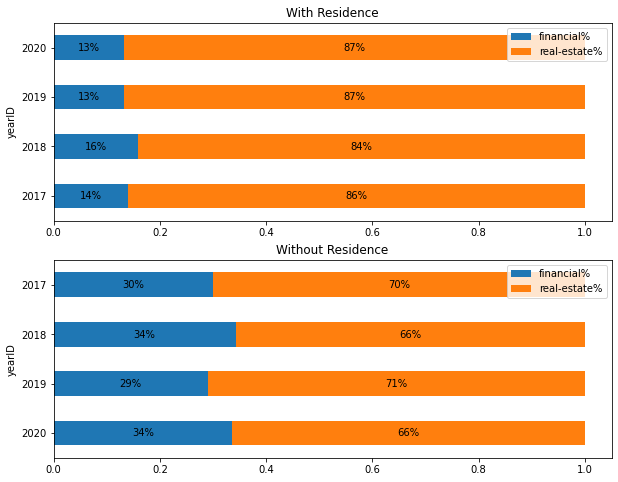

Mean Total: 34335.546269045204


In [205]:
result1 = total_sum1[['financial%','real-estate%']]
result2 = total_sum2[['financial%','real-estate%']]

f,ax = plt.subplots(2,1,figsize=(10,8))

ax[0].set_title('With Residence')
plt.gca().invert_yaxis()
ax0 = result1.plot.barh(stacked=True, ax=ax[0])
for n in ax0.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    ax0.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width*100),
            horizontalalignment='center',
            verticalalignment='center')


ax[1].set_title('Without Residence')

ax1 = result2.plot.barh(stacked=True, ax=ax[1])
plt.gca().invert_yaxis()
for n in ax1.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    ax1.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width*100),
            horizontalalignment='center',
            verticalalignment='center')
plt.show()

print('Mean Total:',df.total.mean())

According to the data, average asset of a household is about 320 million won and about 85% of the total assets are real-estate asset. Without current residence, 60~70% are real-estate asset. This shows that Koreans have high preference for real-estate ++for investment. 

In [193]:
# # real-estate with residence
# re1 = eda[['yearID']]
# for i in re:
#     re1[i] = eda[i] / eda['realestate'] * 100

# # real-estate without residence
# re2 = eda[['yearID']].copy()
# for i in ['house','land','building']:
#     re2[i] = eda[i] / (eda['house']+eda['land']+eda['building']) * 100

# re1 = re1.groupby('yearID').mean()
# re2 = re2.groupby('yearID').mean()

,mean,mean(Y>0),std,std(Y>0),ratio
deposit,3407.425417,4131.487772,6279.589624,6694.886384,0.8247
fund,154.918916,4514.165086,2470.608631,12585.919680,0.0343
bond,23.728527,8015.818034,686.781159,9844.152331,0.0030
stock,383.644954,5426.847112,3177.971607,10750.284926,0.0707
insurance,300.960468,2724.088591,1560.735031,3931.048607,0.1105
lend,53.870774,5315.338562,1321.258015,12041.186529,0.0101
other,69.075307,9627.552073,1424.111196,13855.479077,0.0072
mortage,23.532270,159.152246,93.968479,195.307032,0.1479
pension,382.056484,4712.108778,12507.319725,43704.172128,0.0811
residence,19346.998023,30742.646704,31359.588625,34818.957923,0.6293


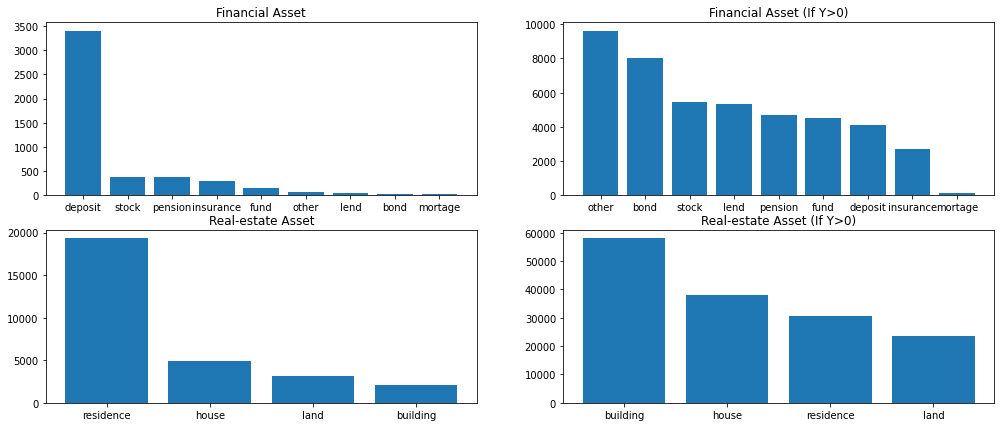

In [214]:
# Asset Proportion
f,ax = plt.subplots(2,2,figsize=(17,7))
result = eda[fin].mean().sort_values(ascending=False)
ax[0,0].bar(result.index, result.values)
ax[0,0].set_title('Financial Asset')

result = eda[fin].replace(0,np.NaN).mean().sort_values(ascending=False)
ax[0,1].bar(result.index, result.values)
ax[0,1].set_title('Financial Asset (If Y>0)')

result = eda[re].mean().sort_values(ascending=False)
ax[1,0].bar(result.index, result.values)
ax[1,0].set_title('Real-estate Asset')

result = eda[re].replace(0,np.NaN).mean().sort_values(ascending=False)
ax[1,1].bar(result.index, result.values)
ax[1,1].set_title('Real-estate Asset (If Y>0)')


# Ratio of Asset Owners
ratio = []
for i in fin+re:
    ratio.append(round(eda[eda[i] > 0].shape[0] / eda.shape[0],4))

# Mean and Std of Assets
ds = []
ds.append(eda[fin+re].mean().values)
ds.append(eda[fin+re].replace(0,np.NaN).mean().values)
ds.append(eda[fin+re].std().values)
ds.append(eda[fin+re].replace(0,np.NaN).std().values)
ds = pd.DataFrame(ds,
             index=['mean','mean(Y>0)','std','std(Y>0)'],
             columns=(fin+re)).T
ds['ratio'] = ratio
ds

The right plot is conditioned to only include observations with value of greater than 0. When it is not conditioned, residence has the highest mean value. However, when it is conditioned, the asset with the highest value is 'building' with the mean of 579 million won. 
Financial assets on the other hand, deposit has the highest mean value when it is unconditioned and when it is conditioned, bonds and stocks are considered to have the highest value with 80 million and 54 million won. Considering that std for the unconditioned is relatively lower than the conditioned (+ratio difference), we can assume that the overall average of the conditioned are increased by the rich. 




### Risk Aversion

The estimated coefficients of the household characteristic variables are consistent with the previous literature using Korean panel data (Kim, 2009, Shin and Joo, 2002). Households with larger net worth and labor income tend to be more likely to participate in the risky asset market. Furthermore, self-employed households are less likely to have risky assets than wage workers. On the other hand, the years of education significantly increases the probability of holding risky assets.

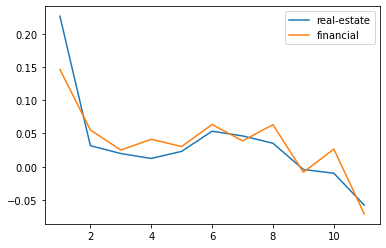

In [ ]:
from sklearn.preprocessing import StandardScaler

# scale the features so that we can visually compare them
sc = StandardScaler()
sc_eda = eda.copy()
sc_eda[['realestate','financial','realestate_nor']] = sc.fit_transform(sc_eda[['realestate','financial','realestate_nor']])

re_sc_eda = sc_eda[['riskaversion','realestate']].groupby('riskaversion').mean()
fin_sc_eda = sc_eda[['riskaversion','financial']].groupby('riskaversion').mean()
plt.plot(re_sc_eda, label='real-estate')
plt.plot(fin_sc_eda, label='financial')
plt.legend()
plt.show()

## Analysis

In [ ]:
# Demand for risky asset by age


1. We will first estimate the probability of holding risky assets using a Logit model
2. Analyze the choice of risky share with a OLS model.
3. Apply OLS model with real-estate variable to identify risk and risk-free assets

Defining what are risk-free or risky assets, requires more caution. However, there are no disagreement on the fact that bond are risk-free asset and stock and corporate bonds are risky assets. Government bond on the other hand, are pratically risk-free assets. However, considering the fluctuation in their returns, government bonds could ultimately be risky assets as well. 

Thus, in this study, financial asset will include bank deposits as risk-free assets and stock and bonds as risky assets. 

 * insurance are excluded because it has the purpose of assurance rather than investment.



In [187]:
X = df.copy()

In [189]:
var = ['']

,hid,pid,yearID,female,marriage,age,education,unemployed,wage-employed,self-employed,income,deposit,fund,bond,stock,insurance,lend,other,mortage,pension,residence,house,land,building,riskaversion
0,10002,1000201.0,2017,1.0,1.0,40.83,0.0,0.0,1.0,0.0,258.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32000.0,0.0,0.0,0.0,6.0
1,10002,1000201.0,2018,1.0,1.0,41.83,0.0,0.0,1.0,0.0,287.000,0.000,304.428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30442.8,0.0,0.0,0.0,6.0
2,10002,1000201.0,2019,1.0,1.0,42.83,0.0,0.0,1.0,0.0,283.000,305.595,203.730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40746.0,0.0,0.0,0.0,8.0
3,10002,1000201.0,2020,1.0,1.0,43.83,0.0,0.0,1.0,0.0,281.000,200.000,0.000,0.0,0.0,0.0,0.0,0.0,40.0,0.0,40000.0,0.0,0.0,0.0,6.0
4,10003,1000301.0,2017,1.0,0.0,69.25,0.0,0.0,1.0,0.0,140.000,50000.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35000.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,99090,9909001.0,2020,1.0,0.0,62.83,0.0,0.0,1.0,0.0,213.000,600.000,0.000,0.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,11.0
23112,99091,9909101.0,2020,1.0,0.0,66.58,0.0,0.0,1.0,0.0,253.000,3000.000,0.000,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,11.0
23113,99092,9909201.0,2020,0.0,1.0,52.00,0.0,0.0,1.0,0.0,228.395,3000.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,11.0
23114,99093,9909301.0,2020,0.0,1.0,52.50,0.0,0.0,0.0,1.0,282.843,900.000,0.000,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,11.0


In [ ]:
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tobit import *

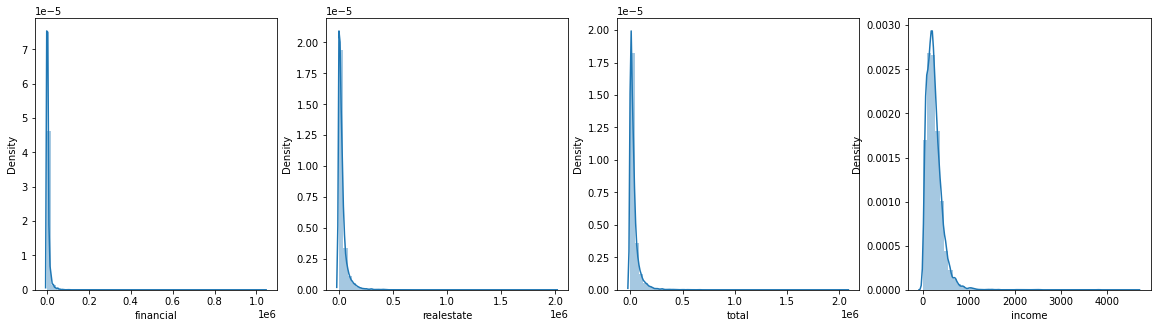

In [ ]:
# Distribution
f,ax = plt.subplots(1,4,figsize=(20,5))
sns.distplot(df.financial, ax=ax[0])
sns.distplot(df.realestate, ax=ax[1])
sns.distplot(df.total, ax=ax[2])
sns.distplot(df.income, ax=ax[3])
plt.show()

In [ ]:
# log()
df['log_financial'] = np.log(df['financial']+0.1)
df['log_realestate'] = np.log(df['realestate']+0.1)
df['log_total'] = np.log(df['total']+0.1)
df['log_income'] = np.log(df['income']+0.1)

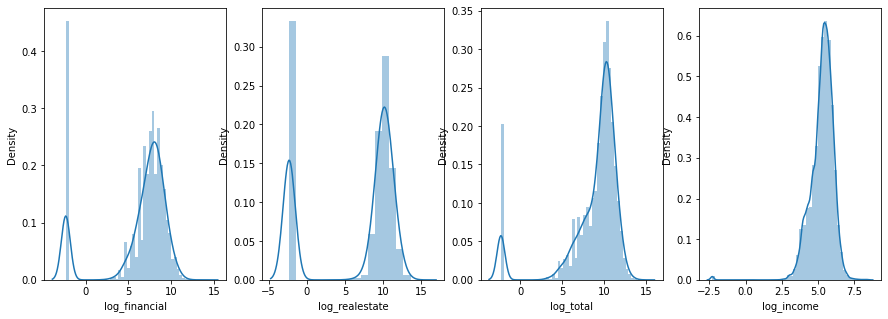

In [ ]:
# Distribution
f,ax = plt.subplots(1,4,figsize=(15,5))
sns.distplot(df.log_financial, ax=ax[0])
sns.distplot(df.log_realestate, ax=ax[1])
sns.distplot(df.log_total, ax=ax[2])
sns.distplot(df.log_income, ax=ax[3])
plt.show()

### Logit Model

In [ ]:
#select variables to use
var = ['yearID','riskaversion','log_income','female','education','wage-employed','self-employed','marriage','age']
df1 = df[var].copy()
df1['age2'] = df1['age']**2

In [ ]:
# One hot encoding
for year in [2017, 2018, 2019]:
    df1[f'{year}'] = df.yearID == year
    df1[f'{year}'] = df1[f'{year}'].astype(np.float32)
df1 = df1.drop(columns='yearID')
# riskyasset (Y) limited to only stock and bond
df1['riskyasset'] = (df.stock != 0) & (df.bond !=0)
df1['riskyasset'] = df1['riskyasset'].astype(np.float32)

In [ ]:
sm.Logit(df1.iloc[:,-1],df1.iloc[:,:-1]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.008759
         Iterations 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             riskyasset   No. Observations:                19931
Model:                          Logit   Df Residuals:                    19919
Method:                           MLE   Df Model:                           11
Date:                Tue, 26 Apr 2022   Pseudo R-squ.:                 0.09084
Time:                        22:22:03   Log-Likelihood:                -174.57
converged:                       True   LL-Null:                       -192.01
Covariance Type:            nonrobust   LLR p-value:                 0.0002589
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
riskaversion     -0.1918      0.063     -3.053      0.002      -0.315      -0.069
log_income        0.5021      0.250      2.009      0.045       0.012       0.992
female         -260.9577   1.81e+56  -1.44e-54      1.000   -3.55e+56    3.55e+56
education         0.9621      0.453      2.124      0.034       0.074       1.850
wage-employed    -1.1687      0.815     -1.434      0.152      -2.766       0.429
self-employed    -0.1049      0.801     -0.131      0.896      -1.674       1.464
marriage         -0.5841      0.558     -1.046      0.296      -1.679       0.510
age              -0.2744      0.050     -5.524      0.000      -0.372      -0.177
age2              0.0021      0.000      4.659      0.000       0.001       0.003
2017              1.5642      0.545      2.868      0.004       0.495       2.633
2018              1.0861      0.613      1.771      0.077      -0.116       2.288
2019              0.9885      0.642      1.540      0.124      -0.270       2.247
=================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
df['age2'] = df['age']**2 
df['ratio'] = df['f_total'] / df['total']
log_df = df.copy()
log_df = log_df[log_df.total != 0]
log_df = log_df[log_df['risk aversion'].isna() == False]
log_df[['income','f_total','r_total','total']] = np.log(log_df[['income','f_total','r_total','total']])

In [ ]:
x = log_df[['yearID','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income']].values
y = log_df['ratio'].values
features = ['yearID','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income']

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
a = pd.DataFrame(x, columns=['2017','2018','2019','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income'])
a['y'] = y
a = a.drop(columns='2019')

In [ ]:
features = ['2017','2018','risk aversion','female','marriage','age','age2','education','wage-employed','self-employed','income']
sm.OLS(a['y'], a[features]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.489
Method:                 Least Squares   F-statistic:                              1108.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                        0.00
Time:                        21:28:56   Log-Likelihood:                         -6096.9
No. Observations:               12725   AIC:                                  1.222e+04
Df Residuals:                   12714   BIC:                                  1.230e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
2017              0.0212      0.009      2.485      0.013       0.004       0.038
2018              0.0178      0.008      2.105      0.035       0.001       0.034
risk aversion     0.0102      0.001      8.137      0.000       0.008       0.013
female            0.0912      0.011      8.024      0.000       0.069       0.113
marriage         -0.1967      0.011    -17.924      0.000      -0.218      -0.175
age               0.0184      0.001     22.412      0.000       0.017       0.020
age2             -0.0002   9.01e-06    -22.368      0.000      -0.000      -0.000
education         0.0531      0.008      6.672      0.000       0.038       0.069
wage-employed     0.0635      0.012      5.264      0.000       0.040       0.087
self-employed    -0.0104      0.012     -0.853      0.393      -0.034       0.013
income        -6.726e-05   1.94e-05     -3.467      0.001      -0.000   -2.92e-05
==============================================================================
Omnibus:                     2592.495   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1309.278
Skew:                           0.639   Prob(JB):                    4.94e-285
Kurtosis:                       2.087   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
f,ax = plt.subplots(2,3,figsize=(17,10))
ax[0,0].scatter(df1.income, df1.riskyasset, alpha=0.2)
ax[0,1].scatter(df1.age, df1.riskyasset, alpha=0.2)
df1[['marriage','riskyasset']].groupby('marriage').mean().plot.bar(ax=ax[0,2])
df1[['education','riskyasset']].groupby('education').mean().plot.bar(ax=ax[1,0])
df1[['female','riskyasset']].groupby('female').mean().plot.bar(ax=ax[1,1])

emp = []
emp.append(df1[df1['wage-employed'] == 1]['riskyasset'].mean())
emp.append(df1[df1['self-employed'] == 1]['riskyasset'].mean())
emp.append(df1[(df1['wage-employed'] == 0) & (df1['self-employed'] == 0)]['riskyasset'].mean())
ax[1,2].bar(['wage-employed','self-employed','unemployed'], emp)
plt.show()